Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 5: Bayesove mreže i naivni Bayesov klasifikator

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.1</i> <br/>
<i>Zadnji put ažurirano: 27. prosinca 2016.</i> 

Objavljeno: **27. prosinca 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **2. siječnja 2017.**

### Upute

Peta laboratorijska vježba sastoji se od tri zadatka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### 1. Bayesove mreže

Ovaj zadatak bavit će se Bayesovim mrežama, jednim od poznatijih probabilističkih grafičkih modela (*probabilistic graphical models*; PGM). Za lakše eksperimentiranje koristit ćemo programski paket [pgmpy](https://github.com/pgmpy/pgmpy). Molimo Vas da provjerite imate li ovaj paket te da ga instalirate ako ga nemate.

#### (a)

Prvo ćemo pogledati udžbenički primjer s prskalicom. U ovom primjeru razmatramo Bayesovu mrežu koja modelira zavisnosti između oblačnosti (sl. varijabla $C$), kiše ($R$), prskalice ($S$) i mokre trave ($W$). U ovom primjeru također pretpostavljamo da već imamo parametre vjerojatnosnih distribucija svih čvorova. Sve varijable modelirane su Bernoullijevom razdiobom.

![This](bayes-net-sprinkler.jpg)

Koristeći paket [pgmpy](https://github.com/pgmpy/pgmpy), konstruirajte Bayesovu mrežu iz gornjeg primjera. Zatim provedite **egzaktno** zaključivanje za sljedeće upite: $P(w=1)$, $P(s=1|w=1)$, $P(r=1|w=1)$, $P(c=1|s=1, r=1)$ i $P(c=1)$. Provedite zaključivanje na papiru i uvjerite se da ste ispravno konstruirali mrežu.

**NB:** Bacite oko na službenu demonstraciju danu na https://github.com/pgmpy/pgmpy/blob/dev/examples/Monte%20Hall%20Problem.ipynb.

In [3]:
from pgmpy.models import BayesianModel, NaiveBayes
from pgmpy.factors import TabularCPD
from pgmpy.inference import VariableElimination

In [4]:
# Vaš kôd ovdje...

# Defining the network structure
model = BayesianModel([('C', 'S'), ('C', 'R'),('S','W'),('R','W')])

# Defining the CPDs:
cpd_c = TabularCPD('C', 2, [[0.5,0.5]])
cpd_s = TabularCPD('S', 2, [[0.5, 0.9],[0.5, 0.1]],
                          evidence=['C'], evidence_card=[2])
cpd_r = TabularCPD('R', 2, [[0.8, 0.2],[0.2, 0.8]],
                          evidence=['C'], evidence_card=[2])
cpd_w = TabularCPD('W', 2, [[1.0, 0.1, 0.1, 0.01],[0.0, 0.9, 0.9, 0.99]],
                  evidence=['S', 'R'], evidence_card=[2, 2])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)

# Some other methods
model.get_cpds()

[<TabularCPD representing P(C:2) at 0x10b431750>,
 <TabularCPD representing P(S:2 | C:2) at 0x10b4317d0>,
 <TabularCPD representing P(R:2 | C:2) at 0x10b431810>,
 <TabularCPD representing P(W:2 | S:2, R:2) at 0x10b431850>]

In [6]:
# check_model check for the model structure and the associated CPD and returns True if everything is correct otherwise throws an exception
model.check_model()

True

In [7]:
infer = VariableElimination(model)
p = infer.query(['W'])
print(p['W'])

+-----+----------+
| W   |   phi(W) |
|-----+----------|
| W_0 |   0.3529 |
| W_1 |   0.6471 |
+-----+----------+


In [131]:
infer = VariableElimination(model)
p = infer.query(['S'], evidence={'W':1})
print(p['S'])

+-----+----------+
| S   |   phi(S) |
|-----+----------|
| S_0 |   0.5702 |
| S_1 |   0.4298 |
+-----+----------+


In [132]:
infer = VariableElimination(model)
p = infer.query(['R'], evidence={'W':1})
print(p['R'])

+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.2921 |
| R_1 |   0.7079 |
+-----+----------+


In [8]:
infer = VariableElimination(model)
p = infer.query(['C'], evidence={'S':1,'R':1})
print(p['C'])

+-----+----------+
| C   |   phi(C) |
|-----+----------|
| C_0 |   0.5556 |
| C_1 |   0.4444 |
+-----+----------+


In [39]:
infer = VariableElimination(model)
p = infer.query(['C'])
print(p['C'])

+-----+----------+
| C   |   phi(C) |
|-----+----------|
| C_0 |   0.5000 |
| C_1 |   0.5000 |
+-----+----------+


**Q:** Koju zajedničku vjerojatnosnu razdiobu ova mreža modelira? Kako tu informaciju očitati iz mreže? <br>
**Q:** U zadatku koristimo egzaktno zaključivanje. Kako ono radi? <br>
**Q:** Ako je trava mokra ($w=1$), što je prema mreži vjerojatnije -- da je pala kiša ($r=1$) ili da je netko upalio prskalicu ($s=1$)? <br>
**Q:** Zašto je vjerojatnost $P(c=1)$ drugačija od $P(c=1|s=1,r=1)$ ako znamo da čvorovi $S$ i $R$ nisu roditelji čvora $C$?

#### (b)

**Efekt objašnjavanja** (engl. *explaining away*) zanimljiv je fenomen u kojem se događa da se dvije varijable "natječu" za objašnjavanje treće. S obzirom na to da i prva i druga varijabla mogu samostalno objasniti treću, ono što se događa jest to da, ako znamo da se ostvarila treća varijabla, naše vjerovanje o prvoj varijabli mijenja ovisno o tome je li se ili nije dogodila druga varijabla (i obrnuto).

Ovaj fenomen može se primijetiti na gornjoj mreži. U tom se slučaju varijable prskalice ($S$) i kiše ($R$) "natječu" za objašnjavanje mokre trave ($W$). Vaš zadatak je pokazati da se fenomen zaista događa.

In [13]:
# Vaš kôd ovdje...
print "Znamo da je trava mokra"
infer = VariableElimination(model)
p = infer.query(['R'], evidence={'W':1})
print(p['R'])

print "Znamo da je trava mokra i da su radile prskalice"
infer = VariableElimination(model)
p = infer.query(['R'], evidence={'W':1, 'S':1})
print(p['R'])

print "Znamo da je trava mokra i da nisu radile prskalice"
infer = VariableElimination(model)
p = infer.query(['R'], evidence={'W':1, 'S':0})
print(p['R'])

Znamo da je trava mokra
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.2921 |
| R_1 |   0.7079 |
+-----+----------+
Znamo da je trava mokra i da su radile prskalice
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.6796 |
| R_1 |   0.3204 |
+-----+----------+
Znamo da je trava mokra i da nisu radile prskalice
+-----+----------+
| R   |   phi(R) |
|-----+----------|
| R_0 |   0.0000 |
| R_1 |   1.0000 |
+-----+----------+


**Q:** Kako biste svojim riječima opisali ovaj fenomen, koristeći se ovim primjerom?

#### (c) 

Koristeći [`BayesianModel.is_active_trail`](http://pgmpy.org/models.html#pgmpy.models.BayesianModel.BayesianModel.is_active_trail) provjerite jesu li varijable oblačnosti ($C$) i mokre trave ($W$) uvjetno nezavisne.

In [14]:
# Vaš kôd ovdje...
model.is_active_trail('C','W')

True

Što mora vrijediti kako te dvije varijable ne bi bile uvjetno nezavisne? Provjerite korištenjem iste funkcije.

In [15]:
# Vaš kôd ovdje...
model.is_active_trail('C','W', observed=['S','R'])

False

**Q:** Kako možemo na temelju grafa saznati koje dvije varijable su, uz neka opažanja, uvjetno nezavisne? <br>
**Q:** Zašto bismo uopće htjeli znati koje su varijable u mreži uvjetno nezavisne?

### 2. Naivan Bayesov klasifikator

Iako je naivni Bayes specijalna podvrsta Bayesovih mreža i mogao bi se modelirati paketom [pgmpy](https://github.com/pgmpy/pgmpy), ipak ćemo se vratiti na paket `sklearn` (radi jednostavnosti). Za demonstraciju rada Bayesovog klasifikatora s diskretnim značajkama treba nam skup primjera s diskretnim značajkama i oznakama klase. Jedan takav ogledni skup podataka jest *digits*:

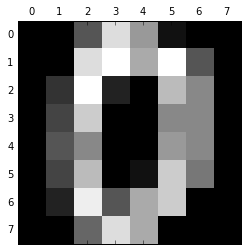

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

plt.gray() 
plt.matshow(digits.images[0])
plt.show();

#### (a)

Ako na ovom skupu želimo trenirati Bernoullijev naivni Bayesov klasifikator, značajke trebamo binarizirati. Proučite funkciju [`binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html) i binarizirajte skup podataka.

Na binariziranom skupu podataka možemo trenirati naš model. Naravno, da bismo mogli ispitati koliko dobro model radi, trebamo izdvojiti dio skupa za ispitivanje. Proučite funkciju [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) te načinite podjelu skupa na 70% primjera za učenje i 30% primjera za ispitivanje.

In [30]:
from sklearn.preprocessing import binarize
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

In [31]:
# Vaš kôd ovdje...
import sklearn.preprocessing as proc
binarizirane_slike = proc.binarize(digits.data) 
print('Primjer binarnizirane slike:')
binarizirane_slike[0]

Primjer binarnizirane slike:


array([ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.])

In [32]:
# dijeljenje primjera u omjeru 70:30
X_train, X_test, y_train, y_test = train_test_split(binarizirane_slike, digits.target, test_size=0.3, random_state=42)

#### (b)

Pročitajte opis modula [`naive_bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html). Za klasifikaciju primjera s diskretnim značajkama treba nam tzv. *Bernoullijev naivni Bayes*, implementiran funkcijom [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB]). Proučite tu funkciju. Trenirajte model na skupu *digits* (na skupu za učenje). Izračunajte točnost modela na skupu za učenje i na skupu za ispitivanje koristeći funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [33]:
import sklearn.naive_bayes as nbay
from sklearn.metrics import accuracy_score

# Vaš kôd ovdje...
bnb = nbay.BernoulliNB()
bnb.fit(X_train, y_train)
print "Train ",accuracy_score(y_train,bnb.predict(X_train))
print "Test ",accuracy_score(y_test,bnb.predict(X_test))

Train  0.857597454256
Test  0.859259259259


**Q:** Je li odnos između tih dviju pogrešaka očekivan? Zašto?

#### (c)

Trenirajte model bez zaglađivanja (`alpha=0`) te izračunajte točnost takvog modela na oba skupa podataka.

In [34]:
# Vaš kôd ovdje...
bnb = nbay.BernoulliNB(alpha=0)
bnb.fit(X_train, y_train)
print "Train ",accuracy_score(y_train,bnb.predict(X_train))
print "Test ",accuracy_score(y_test,bnb.predict(X_test))

Train  0.0994431185362
Test  0.0981481481481


**Q:** U čemu je problem? Opišite svojim riječima.

### 3. Bayesov klasifikator za kontinuirane značajke

#### (a)

Učitajte skup podataka *Iris* i podijelite ga skup za učenje i skup za provjeru u omjeru 70:30. Koristite funkciju [`datasets.load_iris`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

In [35]:
from sklearn.datasets import load_iris
from sklearn import cross_validation

# Vaš kôd ovdje...
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

#### (b)

Proučite razred [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) koji implementira naivan Bayesov klasifikator za kontinuirane značajke. Trenirajte model na skupu za učenje *Iris* i vrednujte njegovu točnost na skupu za ispitivanje.

In [36]:
# Vaš kôd ovdje...
gnb = nbay.GaussianNB()
gnb.fit(X_train, y_train)

print "Train: %g" %accuracy_score(y_train, gnb.predict(X_train))
print "Test: %g" %accuracy_score(y_test, gnb.predict(X_test))

Train: 0.942857
Test: 0.977778


#### (c)

Naivan Bayesov klasifikator u potpunosti zanemaruje korelacije između varijabli. Postavlja se pitanje bi li klasifikator na skupu *Iris* dosezao veću točnost kada bi modelirao (linearne) zavisnosti između varijabli.

Implementirajte Bayesov klasifikator s punom kovarijacijskom matricom za svaku klasu (dakle: nedijeljenom i nedijagonalnom kovarijacijskom matricom). Implementacija se sastoji od dvije funkcije: `train_GB` i `predict_GB`. Funkcija `train_GB(X,y)` neka trenira model Bayesovog klasifikatora sa Gaussovim gustoćama vjerojatnosti i vraća trenirani model. Za procjenu vektora srednjih vrijednosti $\mu_j$ i kovarijacijskih matrica $\Sigma_j$ možete koristiti [ove](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) funkcije. Funkcija `predict_GB(model,X)` neka daje predikcije modela na svim primjerima iz `X`. Alternativno, model možete implementirati kao klasu, a funkcije `train_GB` i `predict_GB` kao njezine metode.


In [37]:
# Vaš kôd ovdje...
def train_GB (X, y):
    mu = {}
    cov_mat = {}
    data = {} 
    P = {}
    h = {} 
    for i in set(y):
        data[i] = X[y == i]
        mu[i] = np.mean(data[i], axis=0) 
        cov_mat[i] = np.cov(data[i], rowvar = 0)
        P[i] = (1.*len(data[i])) / len(X)
    return mu, cov_mat, P
    
def predict_GB (model, X):
    (mu, cov_mat, P) = model
    predictions = [] 
    for x in X:
        hipothesis = [] 
        for i in P: 
            prob = -(1./2*log(np.linalg.det(cov_mat[i]))) 
            prob = prob - ((1./2*((x - mu[i])).dot(np.linalg.inv(cov_mat[i]))).dot(x - mu[i]).T) 
            prob = prob + log(P[i])
            hipothesis.append(prob)
        predictions.append(list(P.keys())[np.argmax(hipothesis)]) #indeks najvjerojatnije klase
    return predictions

#### (d)

Izračunajte točnost modela na ispitnome dijelu skupa *Iris* i usporedite je s točnošću naivnog Bayesovog klasifikatora iz podzadatka (b).

In [38]:
# Vaš kôd ovdje...
gnbcov = train_GB (X_train, y_train)

# Vaš kôd ovdje...
gnb = nbay.GaussianNB()
gnb.fit(X_train, y_train)

print "###Train###"
print "Naive Bayes: %s" %accuracy_score(y_train, gnb.predict(X_train))
print "Naive Bayes Cov: %s" %accuracy_score(y_train, predict_GB (gnbcov, X_train))
print "\n###Test###"
print "Naive Bayes: %s" %accuracy_score(y_test, gnb.predict(X_test))
print "Naive Bayes Cov: %s" %accuracy_score(y_test, predict_GB (gnbcov, X_test))

###Train###
Naive Bayes: 0.942857142857
Naive Bayes Cov: 0.980952380952

###Test###
Naive Bayes: 0.977777777778
Naive Bayes Cov: 1.0
